In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

334 480


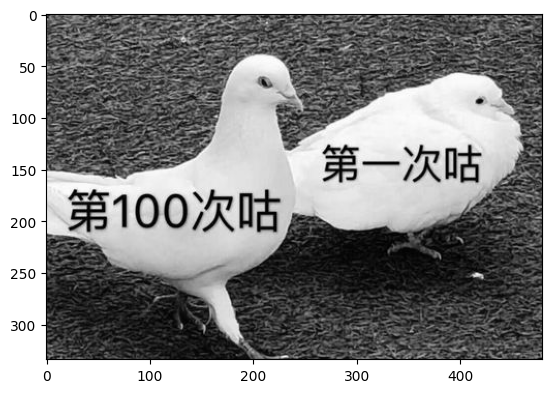

In [10]:
img_path = 'img/test.jpg'
img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2GRAY)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_gray)
height,width= img_gray.shape[:2] 
print(height,width)

定义DPCM函数

In [ ]:
def DPCM(yBuf,dBuf,reBuf,width,height,bitNum):
    #  yBuf: 原始Buffer
    #  dBuf: 残差Buffer
    #  reBuf: 重建Buffer
    #  w，h: 宽、高
    #  bitNum: 量化比特数
    quantized_interval=512/pow(2,bitNum) # 量化间隔
    primary_value=128 #初始
    for i in range(height):
        for j in range(width):
            if j==0:
                delta=yBuf[width*height+1]-primary_value
                dBuf[width*i+j]=((delta+255)/quantized_interval)*quantized_interval/2
                rebuild_value=(dBuf[width*i+j]*2)-256+primary_value
            else:
                delta=yBuf[width*i+j]-reBuf[width*i+j-1]
                dBuf[width*i+j]=((delta+255)/quantized_interval)*quantized_interval/2
                rebuild_value=(dBuf[width*i+j]*2)-256+reBuf[j-1+width*i]
            if rebuild_value>235:
                rebuild_value=235
            elif rebuild_value<16:
                rebuild_value=16
            reBuf[width*i+j]=rebuild_value
    return yBuf,dBuf,reBuf

计算PSNR

In [ ]:
def PSNR(buf1,buf2):
    for i in range(height):
        for j in range(width):
            div=buf1[i*width+j]-buf2[i*width+j]
            mse=mse+div*div
    mse=mse/(width*height)
    psnr=10*np.log10(255*255/mse)
    return psnr

测试